#**Dataset**


In [ ]:
from google.colab import files
uploaded = files.upload()

In [1]:
import pandas as pd
data_encode = pd.read_csv("/content/XRD_Data.csv")
data = pd.read_csv("/content/XRD__data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/XRD_Data.csv'

#XRD
X-ray diffraction (XRD) which is based on constructive interference of X-rays and a crystal sample, is a non-destructive technique that determines the crystallographic structure of materials. XRD pattern is a graph of the intensity of X-rays scattered versus the angle at which they are scattered

# **Target:**


*   **FF:** Fill Factor

#**Features:**

*   **FWHM:** Full width at half maximum
*   **Peak Positon(P):** The angle at which the diffraction peak occurs
*   **Intensity(int):** The height of a peak in the XRD pattern
*   **Relative Intensity(rel_int):** The ratio of the intensity of each peak to the intensity of the largest peak
*   **rel_FWHM:** The ratio of the FWHM of each peak to the FWHM of the largest peak

#PyCaret

In [ ]:
!pip install pycaret[full]

In [ ]:
!pip install interpret-community

##⚡ get all features

In [ ]:
from pycaret.regression import *
s = setup(data, target = 'FF',  train_size = 0.8, session_id = 1543 ,fold=3,
          ignore_features=['Isc'])

In [28]:
best = compare_models(cross_validation= False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.3979,0.2827,0.5317,0.9596,0.0114,0.0090,0.0500
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0200
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,0.0500
rf,Random Forest Regressor,0.9298,1.2245,1.1066,0.8250,0.0262,0.0224,0.2500
ada,AdaBoost Regressor,1.2528,1.7019,1.3046,0.7568,0.0301,0.0295,0.0700
et,Extra Trees Regressor,1.2941,1.8779,1.3704,0.7316,0.0316,0.0305,0.1800
omp,Orthogonal Matching Pursuit,1.2891,2.1431,1.4639,0.6937,0.0341,0.0307,0.0100
lr,Linear Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.0200
huber,Huber Regressor,1.4011,2.7382,1.6547,0.6087,0.0374,0.0325,0.0700
ridge,Ridge Regression,1.3745,2.8604,1.6913,0.5912,0.0391,0.0326,0.0200


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [8]:
gbr = create_model('gbr',return_train_score=True,cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.3979,0.2827,0.5317,0.9596,0.0114,0.0090
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

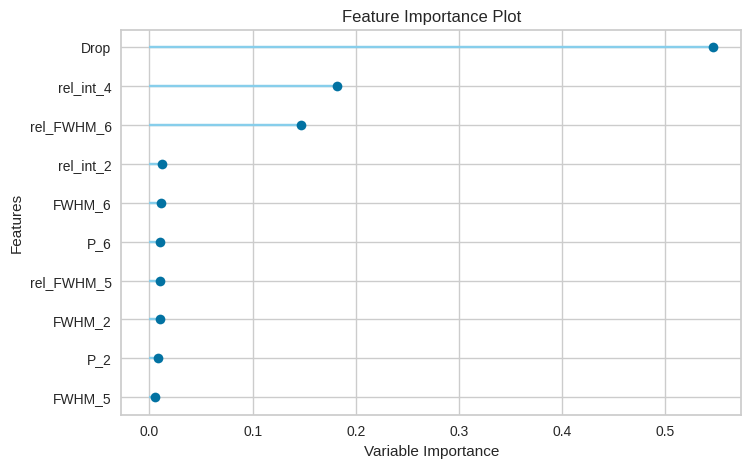

In [9]:
plot_model(gbr, plot = 'feature')



---



---



✅ **ignor some features**

In [ ]:
from pycaret.regression import *
s = setup(data , target = 'FF',  train_size = 0.8, session_id = 1543 ,fold=3,
          ignore_features=['Isc','int_1','int_2','int_3','int_4','int_5','int_6','rel_FWHM_1','rel_FWHM_2','rel_FWHM_3','rel_FWHM_4','rel_FWHM_5','rel_FWHM_6'])

In [11]:
best = compare_models(cross_validation= False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.3933,0.2792,0.5284,0.9601,0.0113,0.0089,0.1000
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0200
xgboost,Extreme Gradient Boosting,0.7717,1.0271,1.0135,0.8532,0.0223,0.0175,0.0500
rf,Random Forest Regressor,0.8686,1.1744,1.0837,0.8322,0.0257,0.0210,0.2500
ada,AdaBoost Regressor,1.1536,1.4604,1.2085,0.7913,0.0274,0.0269,0.1200
et,Extra Trees Regressor,1.3391,1.9260,1.3878,0.7247,0.0319,0.0315,0.1900
lr,Linear Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.0400
lar,Least Angle Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.0300
huber,Huber Regressor,1.4017,2.7223,1.6499,0.6109,0.0373,0.0326,0.0500
catboost,CatBoost Regressor,1.6849,3.9222,1.9804,0.4394,0.0466,0.0404,0.3000


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [12]:
gbr = create_model('gbr',return_train_score=True,cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.3933,0.2792,0.5284,0.9601,0.0113,0.0089
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

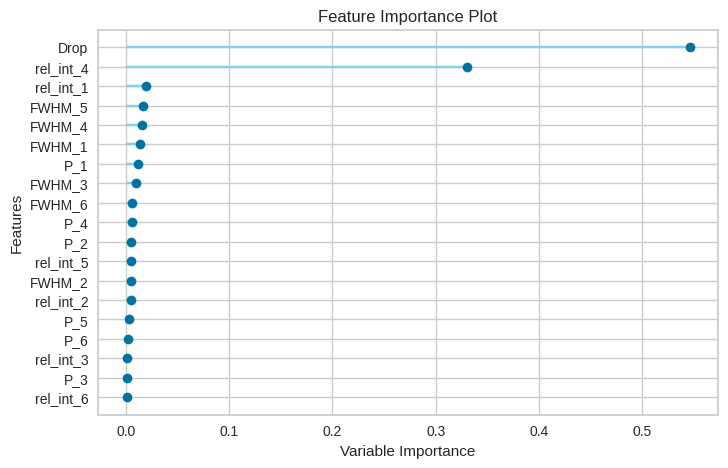

In [13]:
plot_model(gbr, plot = 'feature_all')



---



#⚡ Ordinal Encoding

✅ **ignor some features**

In [ ]:
from pycaret.regression import *
s = setup(data_encode , target = 'FF',  train_size = 0.8, session_id = 1543 ,fold=3,
          ignore_features=['Isc','int_1','int_2','int_3','int_4','int_5','int_6','rel_FWHM_2','rel_FWHM_3','rel_FWHM_4','rel_FWHM_5','rel_FWHM_6'],
          ordinal_features = {'Drop':['S','XS','M','L','XL','XXL']})

In [15]:
best = compare_models(cross_validation= False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.5569,0.6318,0.7948,0.9097,0.0173,0.0124,0.0900
xgboost,Extreme Gradient Boosting,0.8247,0.8838,0.9401,0.8737,0.0215,0.0190,0.1600
ada,AdaBoost Regressor,0.8312,1.1299,1.0630,0.8385,0.0254,0.0202,0.1200
rf,Random Forest Regressor,0.8754,1.3408,1.1579,0.8084,0.0272,0.0209,0.2100
lar,Least Angle Regression,1.2914,2.0485,1.4312,0.7072,0.0324,0.0301,0.0600
lr,Linear Regression,1.2929,2.0492,1.4315,0.7071,0.0324,0.0301,0.0800
dt,Decision Tree Regressor,1.1502,2.2055,1.4851,0.6848,0.0349,0.0270,0.0600
et,Extra Trees Regressor,1.2350,2.4272,1.5579,0.6531,0.0365,0.0287,0.1600
catboost,CatBoost Regressor,1.3050,2.6845,1.6384,0.6163,0.0388,0.0316,0.8600
huber,Huber Regressor,1.6718,3.2555,1.8043,0.5347,0.0402,0.0384,0.0800


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [16]:
gbr = create_model('gbr',return_train_score=True,cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.5569,0.6318,0.7948,0.9097,0.0173,0.0124
Train,0.0529,0.0043,0.0657,0.9992,0.0015,0.0012


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

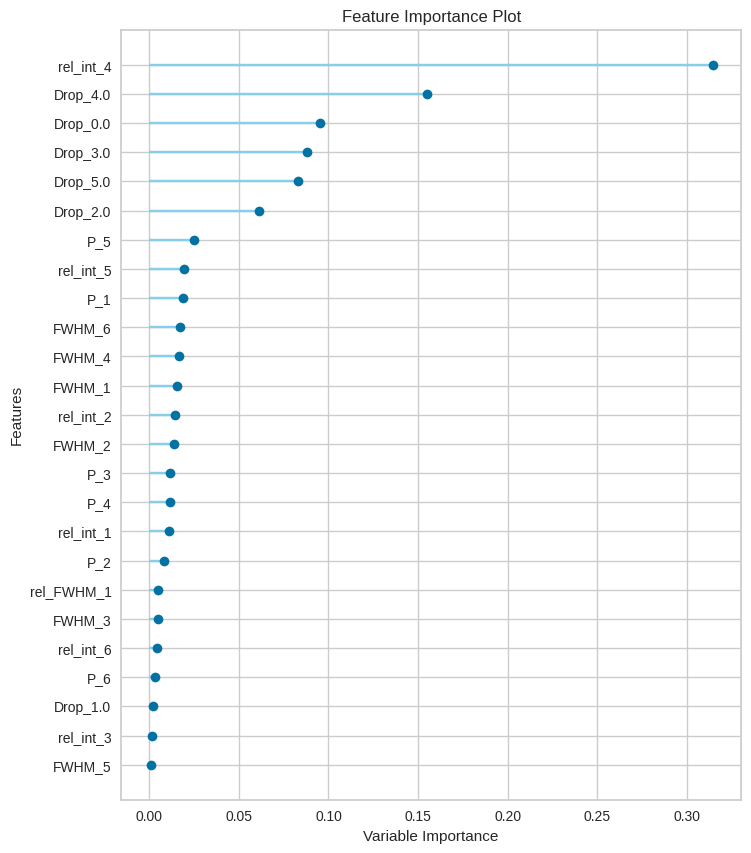

In [17]:
plot_model(gbr, plot = 'feature_all')

In [18]:
gb = gbr.feature_importances_
df = pd.DataFrame({'importance':gb})
df.sort_values(by='importance',ascending=False,inplace=True)
df

,importance
21,0.314592
0,0.154803
5,0.095123
1,0.088236
2,0.083010
4,0.061190
16,0.025195
22,0.019077
12,0.018699
11,0.017084


▶**Feature importance in each sample**

In [19]:
X = data_encode.drop(['Isc','int_1','int_2','int_3','int_4','int_5','int_6','rel_FWHM_2','rel_FWHM_3','rel_FWHM_4','rel_FWHM_5','rel_FWHM_6'], axis=1)
Sample1 = X.iloc[[1,2,3,4,5], :]

In [20]:
interpret_model(gbr ,data=Sample1,plot='msa')

In [21]:
X = data_encode.drop(['Isc','int_1','int_2','int_3','int_4','int_5','int_6','rel_FWHM_2','rel_FWHM_3','rel_FWHM_4','rel_FWHM_5','rel_FWHM_6'], axis=1)
Sample2 = X.iloc[[6,7,8], :]

In [22]:
interpret_model(gbr ,data=Sample2,plot='msa')

❎ It seems to get all the data because sample 2 has only three drops in dataset



---



#**Target:**
*   **Isc:** current short circuit



#⚡ Ordinal Encoding

✅ **ignor some features**

In [ ]:
from pycaret.regression import *
s = setup(data_encode, target = 'Isc',  train_size = 0.8 ,fold=3,
          ignore_features=['FF','int_1','int_2','int_3','int_4','int_5','int_6','rel_FWHM_1','rel_FWHM_2','rel_FWHM_3','rel_FWHM_4','rel_FWHM_5','rel_FWHM_6'], session_id = 797,
          ordinal_features = {'Drop':['S','XS','M','L','XL','XXL']})

In [24]:
best = compare_models(cross_validation= False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,3.7002,17.9516,4.2369,0.9373,0.0115,0.0100,0.1500
lr,Linear Regression,6.8104,54.8938,7.4090,0.8082,0.0196,0.0181,0.0500
lar,Least Angle Regression,9.2519,102.4490,10.1217,0.6420,0.0264,0.0245,0.0500
catboost,CatBoost Regressor,9.4478,118.3418,10.8785,0.5865,0.0292,0.0251,0.8800
rf,Random Forest Regressor,11.3085,152.5966,12.3530,0.4667,0.0329,0.0298,0.2800
et,Extra Trees Regressor,8.2930,153.4838,12.3889,0.4636,0.0346,0.0222,0.2200
ada,AdaBoost Regressor,12.8651,193.9796,13.9277,0.3221,0.0370,0.0338,0.1700
dt,Decision Tree Regressor,11.1333,200.5699,14.1623,0.2991,0.0394,0.0298,0.0500
knn,K Neighbors Regressor,12.3133,207.6064,14.4086,0.2745,0.0379,0.0320,0.0600
huber,Huber Regressor,12.6312,212.8481,14.5893,0.2562,0.0385,0.0338,0.0800


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [25]:
gbr = create_model('gbr',return_train_score=True,cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,3.7002,17.9516,4.2369,0.9373,0.0115,0.0100
Train,0.9133,1.2834,1.1329,0.9975,0.0031,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

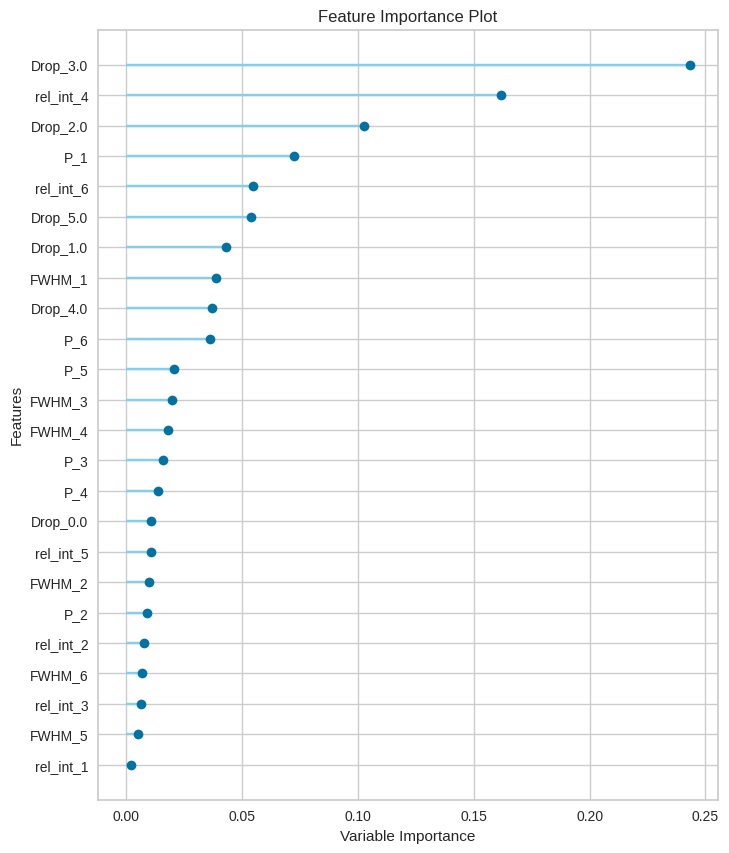

In [26]:
plot_model(gbr, plot = 'feature_all')